# Geospatial Bootstrap (PROVISIONAL)

The goal of this Notebook is to provide links, snippets and examples to help start analysing geospatial data in Python using **GeoPandas**. The tool is geared towards Catalan geographical sources containing data from the province of Tarragona.

## Index
- [Obtaining geospatial data](#Obtaining-geospatial-data)
- [GeoPandas basics](#GeoPandas-basics)
- [Plotting with GeoPandas](#Plotting-with-GeoPandas)
- [Examples](#Examples)

In [2]:
import numpy as np       # https://numpy.org/doc/
import geopandas as gpd  # https://geopandas.org/docs.html

import shapely
from shapely.geometry import Point
import matplotlib.pyplot as plt

import zipfile
import shutil
from os import path, remove

import ipywidgets as widgets

## Obtaining geospatial data

### Get open data from the public administration

- [Institut Cartogràfic de Catalunya (ICGC)](https://www.icgc.cat/en/Downloads)
- [Institut d'Estadística de Catalunya (IDESCAT)](https://www.idescat.cat/?lang=en)
- [Generalitat de Catalunya](https://analisi.transparenciacatalunya.cat/ca/)
- [Gobierno de España](https://datos.gob.es/)
- [Ajuntament de Tarragona](https://www.tarragona.cat/governobert/dades-obertes)
- [Ajuntament de Reus](https://opendata.reus.cat/)

### Get data from general sources

- [Google Dataset Search engine](https://datasetsearch.research.google.com/)
- [Kaggle Datasets](https://www.kaggle.com/datasets)
- [AWS Open Data Registry](https://registry.opendata.aws/)
- [GeoJSON.xyz](http://geojson.xyz/)

### Get data from APIs

APIs may require registration and/or approval for access.
- [Sentinel API](https://www.sentinel-hub.com/develop/api/)
- [OpenWeather API](https://openweathermap.org/api)
- [OGC APIs](https://ogcapi.ogc.org/)
- [OS API](https://osdatahub.os.uk/docs/wmts/overview)

## GeoPandas basics

GeoPandas is the recommended tool in this notebook to manipulate geospatial data. 

GeoPandas extends the pandas library (one of the most popular data manipulation tools in Python), and thus all documentation for the pandas library is valid for GeoPandas as well. When faced with a question or bug that is not related with geospatial features, you may want to look for generic pandas documentation.

### Concepts

| Concept | Library | Description | Documentation |
| --- | --- | --- | --- |
| ndarray | NumPy | pandas and GeoPandas functionalities are built upon the NumPy library. The most relevant NumPy data structure is the ndarray. ndarrays are stored more efficiently than Python lists and allow mathematical operations to be vectorized. | [Link](https://numpy.org/doc/stable/reference/arrays.ndarray.html)
| Series | pandas | A one-dimensional data structure in pandas with stored indexes, labels, and hundreds of methods and properties to easily manipulate structured data. You can create a Series from lists, dictionaries, ndarrays... | [Link](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#series)
| GeoSeries | GeoPandas | A Series for geospatial objects (specifically, a GeoSeries contains Points / Multi-Points, Lines / Multi-Lines, or Polygons / Multi-Polygons) and methods to manipulate such objects with ease. | [Link](https://geopandas.org/reference/geopandas.GeoSeries.html#geopandas-geoseries)
| DataFrame | pandas | Collection of Series encapsulated into a single two-dimensional object. It is the central data structure for pandas and it has been widely adopted in other data science and data manipulation libraries as well. | [Link](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe)
| GeoDataFrame | GeoPandas | Dataframe holding one GeoSeries as a special column. A GeoDataFrame has all the GeoSeries methods plus additional capabilities. | [Link](https://geopandas.org/reference/geopandas.GeoSeries.html#geopandas-geoseries)
| matplotlib integration with pandas | matplotlib | pandas objects can be turned into plots very easily using the matplotlib API in just a couple lines, thus gaining access to a huge plot customization toolset. | [Link](https://pandas.pydata.org/pandas-docs/version/0.13/visualization.html)

### Reading data

GeoPandas reads data directly from vector files with its `read_file()` API. `read_file()` loads a vector spatial file into a GeoDataFrame type variable. Further information is provided [here](https://geopandas.org/docs/user_guide/io.html).

In [ ]:
# Read GeoJSON from URL

geojson_url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_land.geojson"

gdf = gpd.read_file(geojson_url)

In [ ]:
# Read shapefile (.shp) locally

shapefile_abs_path = "<ABSOLUTE_PATH_TO_SHAPEFILE>"

gdf = gpd.read_file(shapefile_abs_path)

In [ ]:
# Read a shapefile (.shp) locally from inside a zip file

zipfile_abs_path = "<ABSOLUTE_PATH_TO_ZIPFILE>"
shapefile_name = "<SHP_FILE_INSIDE_ZIP>"

gdf = gpd.read_file("zip://" + zipfile_abs_path + "!" + shapefile_name)

In [ ]:
# Read a shapefile (.shp) from a Cloud Object Storage (COS)
# IBM COS: https:// ... 
# AWS S3: s3:// ...

object_url = "<COS_FILE_URL>"

gdf = gpd.read_file(object_url)

You can also use predefined GeoPandas datasets, which contain rather bland data.

In [10]:
gpd.datasets.available

['naturalearth_lowres', 'naturalearth_cities', 'nybb']

In [103]:
gdf = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
gdf

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


### Data exploration

From this section onwards, we are going to use the dataset provided with this notebook: `administration_boundaries.zip`.

In [3]:
zipfile_abs_path = "data/administration_boundaries.zip"
shapefile_name = "bm5mv21sh0tpm1_20200601_0.shp"

gdf = gpd.read_file("zip://" + zipfile_abs_path + "!" + shapefile_name)

Quickly get a grasp of the data you are working with:

In [3]:
gdf.info()  # General information about the dataset

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   CODIMUNI   947 non-null    object  
 1   NOMMUNI    947 non-null    object  
 2   AREAOFI    368 non-null    object  
 3   AREAPOL    947 non-null    float64 
 4   CODICOMAR  947 non-null    object  
 5   CODIPROV   947 non-null    object  
 6   VALIDDE    368 non-null    object  
 7   DATAALTA   947 non-null    object  
 8   geometry   947 non-null    geometry
dtypes: float64(1), geometry(1), object(7)
memory usage: 66.7+ KB


In [4]:
gdf.head()   # Prints first 5 lines

,CODIMUNI,NOMMUNI,AREAOFI,AREAPOL,CODICOMAR,CODIPROV,VALIDDE,DATAALTA,geometry
0,080018,Abrera,None,19.9784,11,08,None,202001011200,"POLYGON ((410315.500 4598888.500, 410888.800 4..."
1,080023,Aguilar de Segarra,43.2198,43.2198,07,08,20160727,201707262100,"POLYGON ((384322.708 4625199.422, 384343.603 4..."
2,080039,Alella,None,9.6191,21,08,None,202006011200,"POLYGON ((440348.121 4596214.305, 440355.521 4..."
3,080044,Alpens,13.7788,13.7788,24,08,20171213,201801101500,"POLYGON ((425099.400 4665989.600, 425142.800 4..."
4,080057,l'Ametlla del Vallès,None,14.0885,41,08,None,202006011200,"POLYGON ((436900.772 4617083.908, 436882.966 4..."


In [14]:
gdf['AREAPOL'].describe()  # arithmetic summary of a column

count    947.000000
mean      33.900772
std       34.924789
min        0.623900
25%       12.341500
50%       22.750300
75%       43.001700
max      302.547300
Name: AREAPOL, dtype: float64

Some regular pandas operations:

In [19]:
# Access the column names as a list
gdf.columns[0]

# Get the index of a column for which we know the label
gdf.columns.get_loc("DATAALTA")

# Select all columns except one
column_i_want_to_drop = "AREAOFI"
gdf.drop(column_i_want_to_drop, axis='columns')  # inplace=True to replace in the same DataFrame instead of creating one

# iloc: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html
gdf.iloc[:, 0]
gdf.iloc[2:, -1]

# Select a random row
gdf.sample(axis='rows')

,CODIMUNI,NOMMUNI,AREAOFI,AREAPOL,CODICOMAR,CODIPROV,VALIDDE,DATAALTA,geometry
137,081385,Moià,75.5357,75.5357,42,08,20170726,201707262100,"POLYGON ((425007.438 4635148.538, 425015.409 4..."


In [65]:
gdf_tgn = gdf[gdf['CODIPROV'] == '43']  # filter only towns in Tarragona

(You can check the corresponding identification codes for each province [here](https://www.idescat.cat/codis/?id=50&n=11). Other Catalan administration codes can be obtained [here](https://www.idescat.cat/codis/?id=50&n=9) or at Wikidata, e.g. [province of Tarragona identifiers](https://www.wikidata.org/wiki/Q98392#identifiers))

Group by elements of a certain column:

In [10]:
# How many towns does each province have?
gdf.groupby('CODIPROV')[['CODIMUNI']].count()

,CODIMUNI
CODIPROV,
08,311
17,221
25,231
43,184


In [11]:
# Area that each province covers
gdf.groupby('CODIPROV')[['AREAPOL']].sum()

,AREAPOL
CODIPROV,
08,7730.5704
17,5901.4774
25,12165.6045
43,6306.3788


**Important note:**
"*The most important property of a GeoDataFrame is that it always has one GeoSeries column that holds a special status. This GeoSeries is referred to as the GeoDataFrame's “geometry”.*
"
Instead of regularly accessing the geometry column like you would access a column in regular pandas (i.e. `gdf["<COLUMN_NAME>"]`), you can do:

In [68]:
gdf.geometry  # this points to whichever column holds the relevant GeoSeries data

763    POLYGON ((366871.781 4585034.640, 366874.081 4...
764    POLYGON ((374769.705 4569362.444, 374782.213 4...
765    POLYGON ((340668.502 4570047.461, 340679.093 4...
766    MULTIPOLYGON (((293731.670 4495729.380, 293731...
767    POLYGON ((348803.909 4574253.271, 348804.978 4...
                             ...                        
942    POLYGON ((301179.478 4521621.964, 301183.834 4...
943    POLYGON ((298372.912 4520080.929, 298512.331 4...
944    MULTIPOLYGON (((345810.870 4546572.330, 345807...
945    MULTIPOLYGON (((308777.860 4521146.720, 308777...
946    POLYGON ((346261.400 4555701.400, 346505.500 4...
Name: geometry, Length: 184, dtype: geometry

In [ ]:
# By default, the geometry column is named "geometry".
# You can optionally change the column name (in which case, 
# set here the column name as you please)
gdf.set_geometry("geometry")

In [18]:
print(type(gdf.geometry))    # GeoSeries
print(type(gdf["NOMMUNI"]))  # Series

<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


[Coordinate system](https://geopandas.org/docs/user_guide/projections.html#coordinate-reference-systems) of our data (do take in mind the coordinate system when working with different sources):

In [64]:
gdf.crs

<Projected CRS: EPSG:25831>
Name: ETRS89 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 0°E and 6°E: Andorra; Belgium - onshore and offshore; Denmark - offshore; Germany - offshore; Jan Mayen - offshore; Norway including Svalbard - onshore and offshore; Spain - onshore and offshore.
- bounds: (0.0, 37.0, 6.01, 82.41)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

The method [`.to_crs()`](https://geopandas.org/docs/reference/api/geopandas.GeoSeries.to_crs.html#geopandas.GeoSeries.to_crs) can change the CRS system.

### Geospatial queries

You can test if the geometry data contains any faulty elements with:

In [26]:
gdf[gdf.geometry.is_valid == False]

,CODIMUNI,NOMMUNI,AREAOFI,AREAPOL,CODICOMAR,CODIPROV,VALIDDE,DATAALTA,geometry
244,082476,Santa Eulàlia de Riuprimer,13.8908,13.8908,24,08,20160505,201707262100,"POLYGON ((430235.512 4642601.758, 430260.675 4..."
715,252154,Talarn,None,28.2452,25,25,None,201907011500,"POLYGON ((327439.090 4675243.968, 327677.616 4..."


In [28]:
# gdf = gdf[gdf.geometry.is_valid]  # drops faulty elements (examine elements first to see what is the source of the problem)

Determine the [centroid](https://en.wikipedia.org/wiki/Centroid) of geometry column elements:

In [6]:
gdf.geometry.centroid

0      POINT (409047.003 4596656.880)
1      POINT (385062.751 4620675.272)
2      POINT (440894.838 4594421.322)
3      POINT (424944.643 4663612.589)
4      POINT (438079.583 4612686.210)
                    ...              
942    POINT (301996.333 4517278.599)
943    POINT (298659.456 4513761.727)
944    POINT (344136.055 4549241.695)
945    POINT (305200.808 4520500.271)
946    POINT (347280.064 4553081.614)
Length: 947, dtype: geometry

For a certain point in the map, find the nearest town centroid using `.distance()`:

In [17]:
point = Point(301996.333, 4517278.599)
distances = gdf.geometry.distance(point)
print(distances)

0      129107.198344
1      127455.511654
2      157300.350995
3      188878.608037
4      164051.574570
           ...      
942         0.000000
943      1648.730828
944     50497.850897
945      1297.023873
946     55824.018716
Length: 947, dtype: float64


In [23]:
gdf[distances == min(distances)]

,CODIMUNI,NOMMUNI,AREAOFI,AREAPOL,CODICOMAR,CODIPROV,VALIDDE,DATAALTA,geometry
942,439039,Camarles,None,25.1947,09,43,None,201907011500,"POLYGON ((301179.478 4521621.964, 301183.834 4..."


In [34]:
gdf.representative_point()  # points that are guaranteed to be within each geometry

0      POINT (408710.430 4596604.832)
1      POINT (386340.728 4620892.320)
2      POINT (441085.100 4593995.880)
3      POINT (424348.263 4663692.629)
4      POINT (437767.350 4613319.468)
                    ...              
942    POINT (302008.657 4517188.120)
943    POINT (299519.617 4514613.663)
944    POINT (343930.983 4549077.969)
945    POINT (304178.091 4520112.400)
946    POINT (347169.672 4553461.117)
Length: 947, dtype: geometry

Useful operations to compare geometries as in `.distance()` are `.contains()` and `.intersects()`, which return elementwise boolean results. One can always iterate over a GeoSeries, even though these operations usually can give you a one-liner to solve most needs.

In [61]:
# Bad usage of .contains() (iterating over points and determining whether they fall into the shape)

centroids = gdf.geometry.centroid

j = 0
for i in range(0, len(centroids)):
    centroid = centroids[i]
    town_shape = gdf.geometry[i]
    if not town_shape.contains(centroid):
        j += 1
        
print(f"{j} centroids were out of the area of their corresponding town.")

16 centroids were out of the area of their corresponding town.


In [60]:
# Good usage of .contains() (taking profit of elementwise operations)

gdf.geometry.contains(gdf.centroid).value_counts()

True     931
False     16
dtype: int64

This behaviour is extensible to the whole of pandas data structures. Rarely will you ever want to explicitly iterate rows as there are many methods to solve every need.

Some other geospatial operations: [`.crosses()`](https://geopandas.org/docs/reference/api/geopandas.GeoSeries.crosses.html#geopandas.GeoSeries.crosses), [`.touches()`](https://geopandas.org/docs/reference/api/geopandas.GeoSeries.touches.html#geopandas.GeoSeries.touches), [`.overlaps()`](https://geopandas.org/docs/reference/api/geopandas.GeoSeries.overlaps.html#geopandas.GeoSeries.overlaps)

## Plotting with GeoPandas

Plotting is very easy with GeoPandas, even though you can achieve a great deal of customization if you wish so. 

<AxesSubplot:>

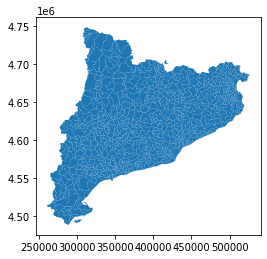

In [7]:
gdf.plot()  # generates the plot based on the geometry column

# Outside of Jupyter:

# import matplotlib.pyplot as plt
# municipis.plot()

# plt.show()
# or
# plt.save()

<AxesSubplot:>

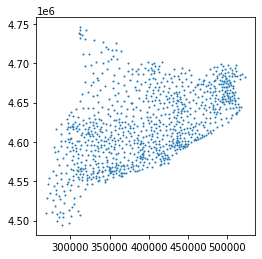

In [47]:
gdf.geometry.centroid.plot(markersize=1)  # other GeoSeries objects such as the .centroid property can be plotted, too

In [4]:
# Run this if you haven't done so
# gdf_tgn = gdf[gdf['CODIPROV'] == '43']

<AxesSubplot:>

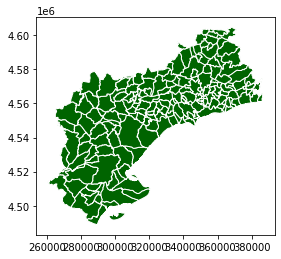

In [130]:
gdf_tgn.plot(color="darkgreen", edgecolor="white")

You can also stack different features in the same plot by calling the `.plot()` function multiple times.

Consider the order of the tiles; it will determine the order in the z-axis in some cases.

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

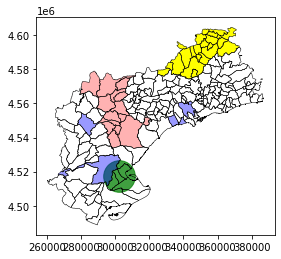

In [135]:
ax = gdf_tgn.plot(ax=ax)
ax.set_axis_off()

tgn = gdf_tgn.boundary.plot(color="black", linewidth=0.5)

point = gpd.GeoSeries(Point(301996.333, 4517278.599))
point.plot(ax=tgn, color="green", markersize=1000, alpha=0.75)

towns = ["Reus", "Gandesa", "Cambrils", "Tortosa"]
gdf_tgn[gdf_tgn["NOMMUNI"].isin(towns)].plot(ax=tgn, color="blue", alpha=0.4)

gdf_tgn[gdf_tgn["CODICOMAR"] == "16"].plot(ax=tgn, color="yellow")
gdf_tgn[gdf_tgn["CODICOMAR"] == "30"].plot(ax=tgn, color="red", alpha=0.3)

You can also make visual changes to the figure and axes.

<AxesSubplot:>

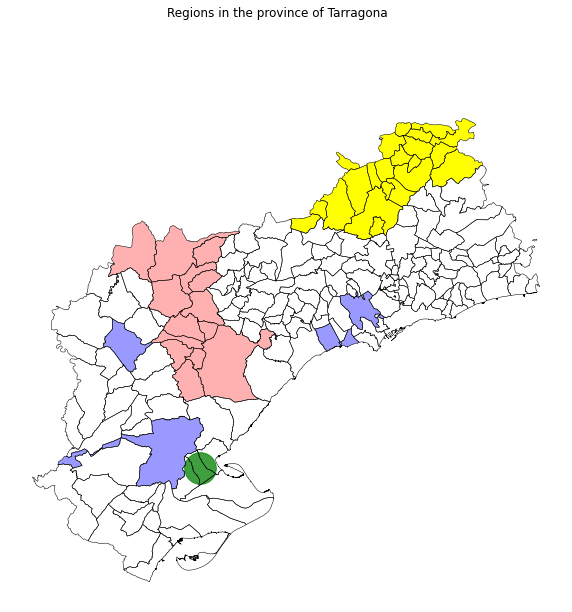

In [148]:
# In order to make visual changes we need variables for the axes
figure, ax = plt.subplots(1, figsize=(10, 10))

figure.suptitle("Regions in the province of Tarragona")

tgn = gdf_tgn.boundary.plot(ax=ax, color="black", linewidth=0.5)
tgn.set_axis_off()

point = gpd.GeoSeries(Point(301996.333, 4517278.599))
point.plot(ax=tgn, color="green", markersize=1000, alpha=0.75)

towns = ["Reus", "Gandesa", "Cambrils", "Tortosa"]
gdf_tgn[gdf_tgn["NOMMUNI"].isin(towns)].plot(ax=tgn, color="blue", alpha=0.4)

gdf_tgn[gdf_tgn["CODICOMAR"] == "16"].plot(ax=tgn, color="yellow")
gdf_tgn[gdf_tgn["CODICOMAR"] == "30"].plot(ax=tgn, color="red", alpha=0.3)

Usage of the [`plt.subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) function not only helps you get the necessary variables for axis customization, it will help you make grid displays with several plots. In such a case, `ax` will be an iterable containing `rows * columns` items.

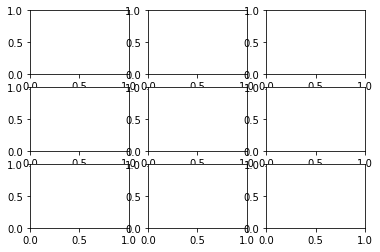

In [60]:
figure, ax = plt.subplots(nrows=3, ncols=3)  # nrows and ncols are positional arguments, no need to specify the argument keyword

<AxesSubplot:>

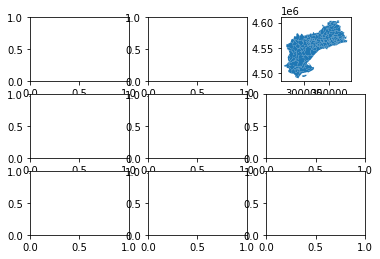

In [64]:
figure, ax = plt.subplots(nrows=3, ncols=3) 

gdf_tgn.plot(ax=ax[0][2])

### Displaying column values in the map

An important part of mapping with GeoPandas is the ability to display values within other columns in the GeoDataFrame. Otherwise we would only make use of the `.geometry` column, which in itself is usually not very useful.

Suppose we want to see which counties ("comarques") have the biggest towns (average area) in the province of Tarragona and we want to display the differences in a map, using a gradient of colors. We have a column `AREAPOL` which tells us the area of each town. So:

In [18]:
mean_area = gdf_tgn.groupby("CODICOMAR")[["AREAPOL"]].mean()
mean_area

,AREAPOL
CODICOMAR,
01,23.375091
08,24.893093
09,71.567321
12,21.174986
16,29.572300
22,61.192000
29,21.655543
30,59.081821
36,14.571695


In [21]:
mean_area['CODICOMAR'] = mean_area.index
mean_area

,AREAPOL,CODICOMAR
CODICOMAR,,
01,23.375091,01
08,24.893093,08
09,71.567321,09
12,21.174986,12
16,29.572300,16
22,61.192000,22
29,21.655543,29
30,59.081821,30
36,14.571695,36


<AxesSubplot:>

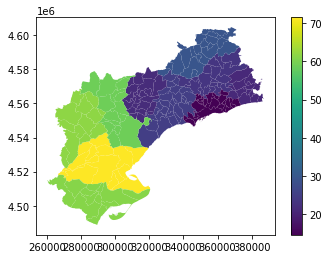

In [29]:
gdf_tgn \
    .set_index('CODICOMAR') \
    .join(mean_area.set_index('CODICOMAR'), rsuffix='_MEAN') \
    .plot(
        column='AREAPOL_MEAN',  # The column containing the values to map
        legend=True             # Display a legend for the continuous values
    )

If you want to customize the legend, you will need to do something along the lines of:
```
figure, ax = plt.subplots(...)

ax.legend(
      fontsize=...,
      frameon=...,
      title=...
)
```

### Interactive maps

The following libraries can help you create an interactive map within a Jupyter Notebook:

https://github.com/python-visualization/folium

https://github.com/jupyter-widgets/ipyleaflet

https://github.com/jwass/mplleaflet

https://docs.bokeh.org/en/latest/docs/user_guide/jupyter.html

## Examples

### Example: visualize high slope areas (> 20%) in a given Tarragona town

This example makes use of [the Slope map dataset](https://www.icgc.cat/en/Public-Administration-and-Enterprises/Downloads/Geoinformation-layers/Slope-map-20) by Institut Cartogràfic de Catalunya, which provides shapefiles indicating the position of high slope areas in a particular region.

In [30]:
options = [(town["NOMMUNI"], town["CODIMUNI"]) for index, town in gdf_tgn.iterrows()]

choose_town = widgets.Dropdown(
    options=options,
    value="431482",
    description='Town:',
)

**Step 1: choose a town for which to visualize the high slope areas.**

In [31]:
choose_town

Dropdown(description='Town:', index=146, options=(('Aiguamúrcia', '430017'), ('Albinyana', '430022'), ("l'Albi…

We generate a shapefile containing the town limits:

In [42]:
town_borders = gdf_tgn[gdf_tgn["CODIMUNI"] == choose_town.value].geometry

<AxesSubplot:>

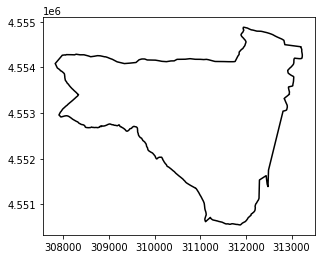

In [43]:
town_borders.boundary.plot(color="black")

In [44]:
town_borders_shp_path = "data/town_borders_" + choose_town.value

In [47]:
# This will output a folder with several files
town_borders.to_file(town_borders_shp_path)

In [48]:
shutil.make_archive(town_borders_shp_path, 'zip', town_borders_shp_path)
shutil.rmtree(town_borders_shp_path)

**Step 2: go to [this link](http://www.icc.cat/appdownloads/?c=dlfxsolsp20). Choose ".shp" under "3.Select format" in the left toolbar. Then, select "Import an area" and choose the .zip file we just generated ("town_borders_XXXXXX.zip"); then, proceed to "Download data". Place the resulting downloaded .zip file in any directory and insert its absolute path in the following variable:**

In [49]:
zip_path = "/absolute/path/to/my/downloaded/zipfile.zip"  # CHANGE THIS

We provide the following utility function to read and load the data directly into a GeoDataFrame:

In [50]:
def read_icgc_file(my_path):    
    my_dir = path.dirname(my_path)
    gs = gpd.GeoSeries()
    
    with zipfile.ZipFile(my_path) as zip:
        files = zip.namelist()
        zip.extractall(path=my_dir)
        
        for file in files:
            file_path = my_dir + "/" + file
            with zipfile.ZipFile(file_path) as inner_zip:
                for shapefile in inner_zip.namelist():
                    if shapefile.endswith(".shp"):
                        series = gpd.read_file(file_path + "!" + shapefile).geometry
                        gs = gs.append(series)
            remove(file_path)
            
    return gs

In [51]:
high_slope = read_icgc_file(zip_path)
high_slope = town_borders.intersection(high_slope.unary_union)  # Discard any areas out of the town borders 
                                                                # (ICGC files usually cover a wider zone than requested)

Show in blue the high slope areas in the town:

<AxesSubplot:>

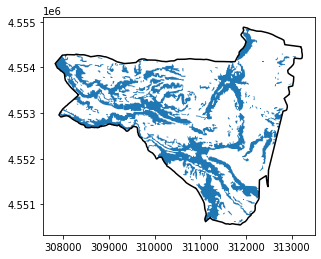

In [55]:
ax = town_borders.boundary.plot(color="black")
high_slope.plot(ax=ax)

Compute the % area of the city that has high slope, using the `.area()` method:

In [53]:
percentage = float(high_slope.area / town_borders.area * 100)
print(f"{percentage:.4f}%")

30.3952%
